204924
Found 223074 files belonging to 29 classes.
Using 22308 files for training.
Found 223074 files belonging to 29 classes.
Using 22307 files for validation.
0.0 1.0
Epoch 1/20
1395/1395 [==============================] - 205s 146ms/step - loss: 1.9326 - accuracy: 0.4411 - val_loss: 0.9324 - val_accuracy: 0.7184
Epoch 2/20
1395/1395 [==============================] - 204s 146ms/step - loss: 0.5111 - accuracy: 0.8424 - val_loss: 0.6080 - val_accuracy: 0.8361
Epoch 3/20
1395/1395 [==============================] - 203s 146ms/step - loss: 0.2157 - accuracy: 0.9321 - val_loss: 0.6714 - val_accuracy: 0.8460
Epoch 4/20
1395/1395 [==============================] - 204s 146ms/step - loss: 0.1401 - accuracy: 0.9570 - val_loss: 0.7061 - val_accuracy: 0.8562
Epoch 5/20
1395/1395 [==============================] - 204s 146ms/step - loss: 0.0934 - accuracy: 0.9745 - val_loss: 0.9502 - val_accuracy: 0.8304
Epoch 6/20
1395/1395 [==============================] - 203s 146ms/step - loss: 0.0896 - ac

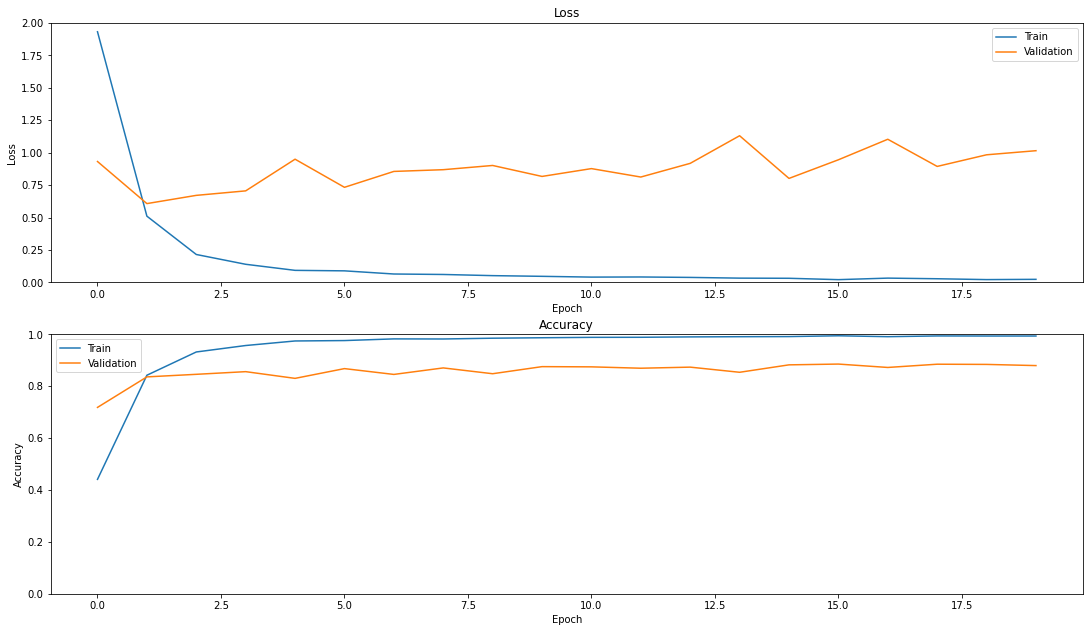

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import keras
from keras import layers

data_dir = pathlib.Path(r"C:\Users\sh1vi\Downloads\ASL_Alphabet_Dataset\asl_alphabet_train")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

batch_size = 16
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.9,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = 29

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#train_ds = np.asarray(train_ds)
#val_ds = np.asarray(val_ds)

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

def plot_history(history):
  """
    Plotting training and validation learning curves.

    Args:
      history: model history with all the metric measures
  """
  fig, (ax1, ax2) = plt.subplots(2)

  fig.set_size_inches(18.5, 10.5)

  # Plot loss
  ax1.set_title('Loss')
  ax1.plot(history.history['loss'], label = 'train')
  ax1.plot(history.history['val_loss'], label = 'test')
  ax1.set_ylabel('Loss')

  # Determine upper bound of y-axis
  max_loss = max(history.history['loss'] + history.history['val_loss'])

  ax1.set_ylim([0, np.ceil(max_loss)])
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation']) 

  # Plot accuracy
  ax2.set_title('Accuracy')
  ax2.plot(history.history['accuracy'],  label = 'train')
  ax2.plot(history.history['val_accuracy'], label = 'test')
  ax2.set_ylabel('Accuracy')
  ax2.set_ylim([0, 1])
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  plt.show()

plot_history(history)

model.save("D:\Models\ASL.keras")